# 載入資料套件

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

datapath = "/content/gdrive/My Drive/AI_imdb/"


In [3]:
data0 = pd.read_excel(datapath+'0714trainv11_statA1.xlsx')

In [4]:
data = data0[['Input_A1_015','Input_C_086','Input_C_137','Input_A1_021','Input_C_056','Input_C_001','Input_C_059','Input_C_060','Input_A1_018','Input_A1_017','Input_C_039',"Input_A1_020"]]

In [ ]:
print("data set shape: ", data.shape) # 看有幾個rows & columns
data.head() #顯示前五筆資料

data set shape:  (240, 12)


,Input_A1_015,Input_C_086,Input_C_137,Input_A1_021,Input_C_056,Input_C_001,Input_C_059,Input_C_060,Input_A1_018,Input_A1_017,Input_C_039,Input_A1_020
0,0.02,NaN,1,0.521,0.005,3.6,0.005,0.009,-0.04,-0.04,0.0012,0.0
1,0.02,0.010,1,0.563,0.004,4.0,0.005,0.012,-0.04,-0.03,0.0010,0.0
2,0.02,0.006,1,0.453,0.004,4.0,0.006,0.019,-0.04,-0.04,0.0012,0.0
3,0.02,NaN,1,0.453,0.005,3.4,0.005,0.016,-0.04,-0.04,0.0012,0.0
4,0.02,0.004,1,0.452,0.005,3.6,0.003,0.012,-0.03,-0.05,0.0012,0.0


In [ ]:
# 定義用來統計欄位缺漏值總數的函數
def Missing_Counts( Data ) : 
    missing = Data.isnull().sum()  # 計算欄位中缺漏值的數量 
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True ) 
    
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count
print( 'train :' )
display( Missing_Counts(data) )

train :


,ColumnName,MissingCount,Percentage(%)
0,Input_C_086,53,22.08


In [ ]:
#observe the numerical data
data.describe()

,Input_A1_015,Input_C_086,Input_C_137,Input_A1_021,Input_C_056,Input_C_001,Input_C_059,Input_C_060,Input_A1_018,Input_A1_017,Input_C_039,Input_A1_020
count,240.000000,187.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.003375,0.005139,1.341667,0.538154,0.003744,3.837917,0.003744,0.010983,-0.028000,-0.028625,0.001158,0.118750
std,0.025741,0.002340,0.585685,0.052265,0.001889,0.330367,0.001967,0.007804,0.012348,0.010196,0.000315,0.096065
min,-0.050000,0.002000,0.000000,0.400000,0.000300,3.000000,0.000400,0.000200,-0.050000,-0.050000,0.000500,0.000000
25%,-0.020000,0.004000,1.000000,0.500000,0.001475,3.500000,0.001300,0.001175,-0.040000,-0.040000,0.000900,0.100000
50%,0.010000,0.004000,1.000000,0.547000,0.004000,3.850000,0.004000,0.012000,-0.030000,-0.030000,0.001100,0.100000
75%,0.020000,0.006000,2.000000,0.581250,0.005000,4.000000,0.005000,0.016000,-0.020000,-0.020000,0.001300,0.200000
max,0.050000,0.010000,3.000000,0.600000,0.006000,4.500000,0.006000,0.030000,-0.010000,-0.010000,0.002400,0.600000


In [ ]:
A_Counts = data['Input_A1_020'].value_counts().reset_index()
A_Counts.columns = ['Input_A1_020','Counts']
A_Counts

,Input_A1_020,Counts
0,0.1,103
1,0.2,66
2,0.0,57
3,0.3,10
4,0.5,2
5,0.6,1
6,0.4,1


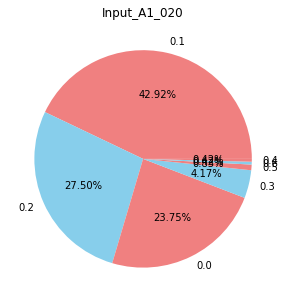

In [ ]:
plt.figure( figsize=(10,5) )
data['Input_A1_020'].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Input_A1_020' )  # 圖標題
plt.ylabel( '' )
plt.show()

In [ ]:
Corr_Matrix = data.corr()  # 計算相關係數
Corr = Corr_Matrix.loc['Input_A1_020',:].sort_values()[:-1]
Corr = pd.DataFrame({ 'Input_A1_020':Corr })
Corr

,Input_A1_020
Input_C_059,-0.376317
Input_C_056,-0.371719
Input_C_060,-0.334260
Input_C_086,-0.315542
Input_A1_015,-0.193206
Input_C_039,-0.115137
Input_C_001,0.010465
Input_A1_021,0.217174
Input_A1_017,0.298220
Input_A1_018,0.349205


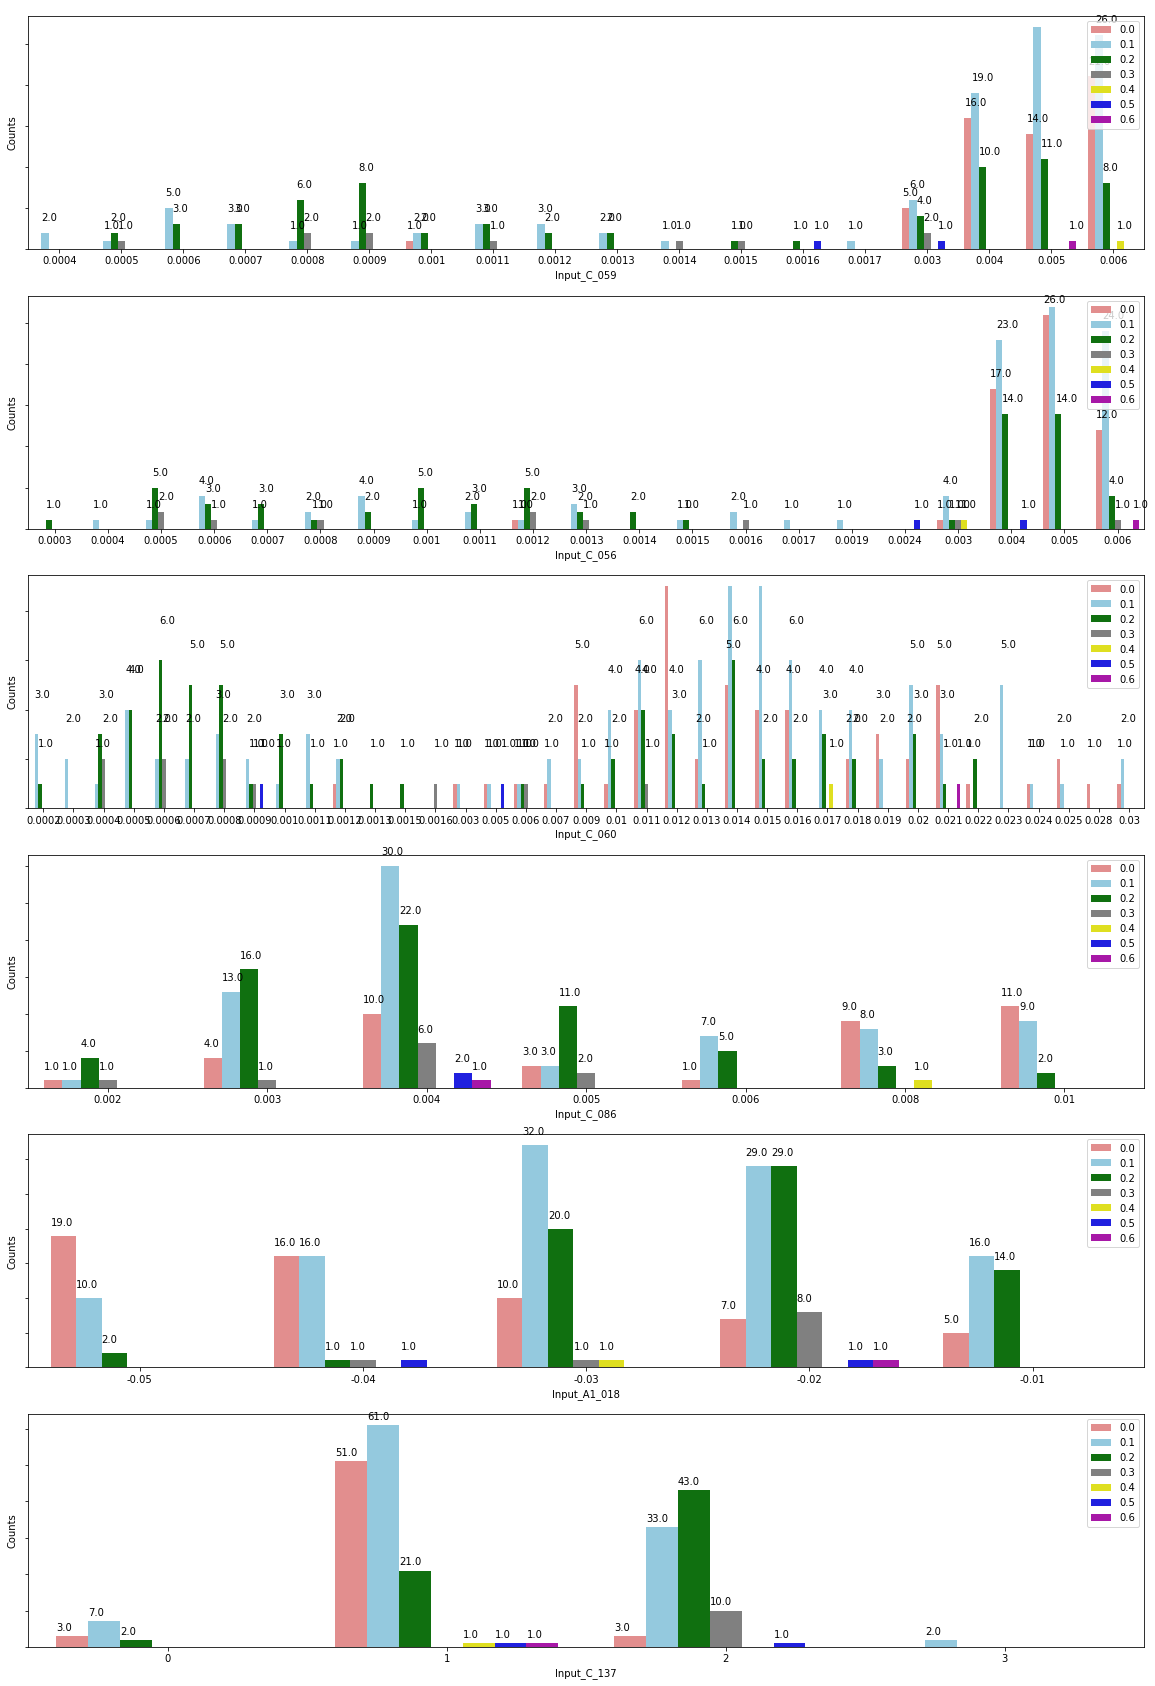

In [ ]:
selected_cols = ['Input_C_059','Input_C_056','Input_C_060','Input_C_086','Input_A1_018','Input_C_137']
plt.figure( figsize=(20,len(selected_cols)*5) )
gs = gridspec.GridSpec(len(selected_cols),1)    
for i, col in enumerate( data[selected_cols] ) :        
    ax = plt.subplot( gs[i] )
    sns.countplot( data[col], hue=data.Input_A1_020, palette=['lightcoral','skyblue','g','grey','yellow','blue','m'] )
    ax.set_yticklabels([])
    ax.set_ylabel( 'Counts' )
    ax.legend( loc=1 )
    for p in ax.patches:
        ax.annotate( '{:,}'.format(p.get_height()), (p.get_x(), p.get_height()+1.5) )
plt.show()

In [ ]:
for col in selected_cols:
    l = ['Input_A1_020']
    l.append(col) 
    Survival_Rate = data[l].groupby(by=col).mean().round(4).reset_index()
    Survival_Rate.columns = [col,'Input_A1_020 Rate(%)']
    Survival_Rate['Input_A1_020 Rate(%)'] = Survival_Rate['Input_A1_020 Rate(%)'].map( lambda x:x*100 )
    display( Survival_Rate ) 

,Input_C_059,Input_A1_020 Rate(%)
0,0.0004,10.00
1,0.0005,20.00
2,0.0006,13.75
3,0.0007,15.00
4,0.0008,21.11
5,0.0009,20.91
6,0.0010,12.00
7,0.0011,17.14
8,0.0012,14.00
9,0.0013,15.00


,Input_C_056,Input_A1_020 Rate(%)
0,0.0003,20.00
1,0.0004,10.00
2,0.0005,21.25
3,0.0006,16.25
4,0.0007,17.50
5,0.0008,17.50
6,0.0009,13.33
7,0.0010,18.33
8,0.0011,16.00
9,0.0012,18.89


,Input_C_060,Input_A1_020 Rate(%)
0,0.0002,12.50
1,0.0003,10.00
2,0.0004,21.67
3,0.0005,15.00
4,0.0006,20.00
5,0.0007,17.14
6,0.0008,19.00
7,0.0009,24.00
8,0.0010,17.50
9,0.0011,12.50


,Input_C_086,Input_A1_020 Rate(%)
0,0.002,17.14
1,0.003,14.12
2,0.004,15.21
3,0.005,16.32
4,0.006,13.08
5,0.008,8.57
6,0.010,5.91


,Input_A1_018,Input_A1_020 Rate(%)
0,-0.05,4.52
1,-0.04,7.43
2,-0.03,12.34
3,-0.02,16.27
4,-0.01,12.57


,Input_C_137,Input_A1_020 Rate(%)
0,0,9.17
1,1,8.68
2,2,17.11
3,3,10.00


In [ ]:
Missing_Counts( data.drop('Input_A1_020', axis=1) )

,ColumnName,MissingCount,Percentage(%)


In [5]:
data['is086'] = data['Input_C_086'].isnull().map( lambda x:0 if x==True else 1 )
# 計算每個 Title 的年齡平均值及中位數
Input_C_086_Mean = data[['Input_A1_020','Input_C_086']].groupby( by=['Input_A1_020'] ).mean()
Input_C_086_Mean.columns = ['Input_C_086 Mean']
Input_C_086_Mean.reset_index( inplace=True )
display( Input_C_086_Mean )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Input_A1_020,Input_C_086 Mean
0,0.0,0.006590
1,0.1,0.005239
2,0.2,0.004333
3,0.3,0.003900
4,0.4,0.008000
5,0.5,0.004000
6,0.6,0.004000


In [6]:
# 利用每個 Title 的年齡平均數，填補每個 Title 所對應 Age 的缺漏值
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.0),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.0,'Input_C_086 Mean'][0]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.1),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.1,'Input_C_086 Mean'][1]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.2),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.2,'Input_C_086 Mean'][2]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.3),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.3,'Input_C_086 Mean'][3]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.4),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.4,'Input_C_086 Mean'][4]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.5),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.5,'Input_C_086 Mean'][5]
data.loc[(data.Input_C_086.isnull())&(data.Input_A1_020==0.6),'Input_C_086'] = Input_C_086_Mean.loc[Input_C_086_Mean.Input_A1_020==0.6,'Input_C_086 Mean'][6]

# 刪除 isAge 欄位 
data.drop( 'is086', axis=1, inplace=True )

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Missing_Counts( data.drop('Input_A1_020', axis=1) )

,ColumnName,MissingCount,Percentage(%)


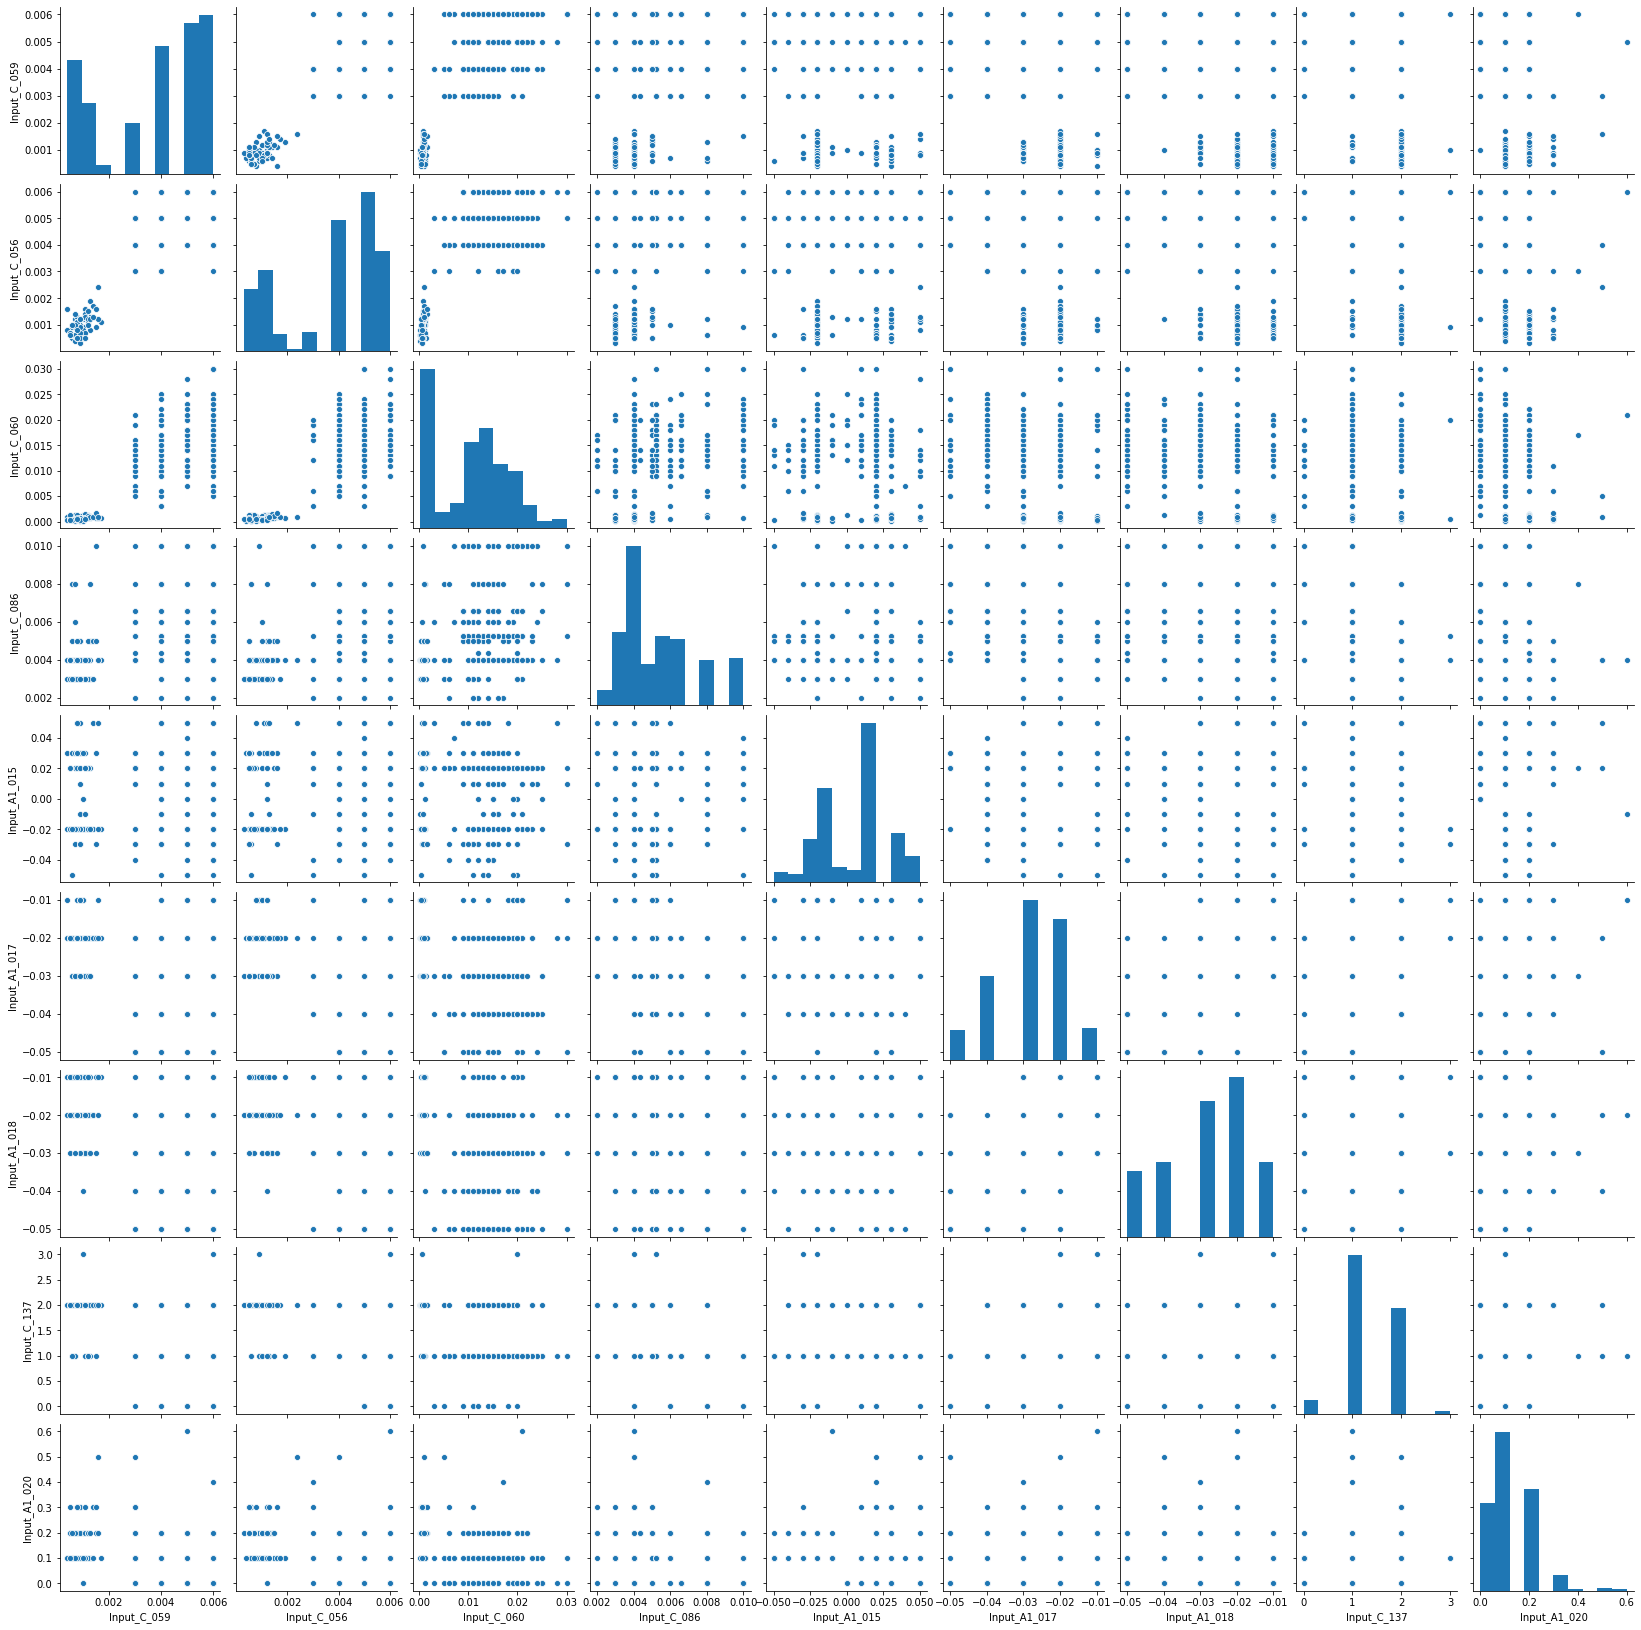

In [ ]:
sns.pairplot(data,vars=['Input_C_059','Input_C_056','Input_C_060','Input_C_086','Input_A1_015','Input_A1_017','Input_A1_018','Input_C_137','Input_A1_020'])  #data,kind="reg",diag_kind="kde"

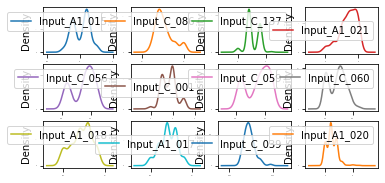

In [ ]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1)
plt.show()

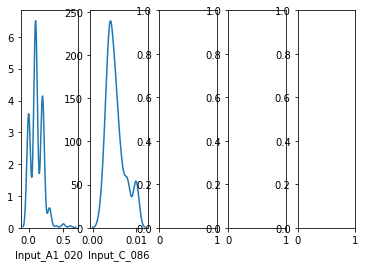

In [ ]:
fig,axes=plt.subplots(1,5)
sns.distplot(data["Input_A1_020"], hist = False, kde = True,ax=axes[0])
sns.distplot(data["Input_C_086"], hist = False, kde = True,ax=axes[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


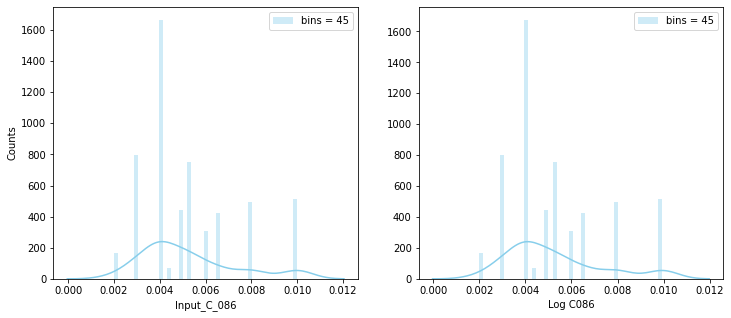

In [ ]:
# 對 Fare 欄位取對數
data['LogC086'] = np.log1p( data.Input_C_086 )

# 直方圖(Histogram)
fig, axs = plt.subplots( 1,2,figsize=(12,5) )

plt.subplot( 1,2,1 )
sns.distplot( data.Input_C_086, kde=True, bins=45, color='skyblue', label='bins = 45' )
plt.xlabel( 'Input_C_086' ) 
plt.ylabel( 'Counts' ) 
plt.legend( )

plt.subplot( 1,2,2 )
sns.distplot( data.LogC086, kde=True, bins=45, color='skyblue', label='bins = 45' )
plt.xlabel( 'Log C086' ) 
plt.ylabel( '' ) 
plt.legend( )

plt.show()

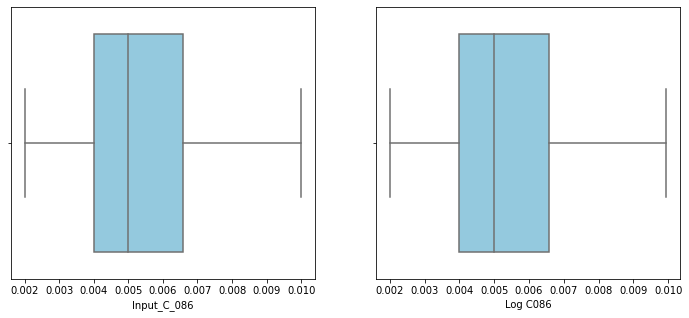

In [ ]:
fig, axs = plt.subplots( 1,2,figsize=(12,5) )

plt.subplot( 1,2,1 )
sns.boxplot( data.Input_C_086, orient='h', color='skyblue' )
plt.xlabel( 'Input_C_086' ) 

plt.subplot( 1,2,2 )
sns.boxplot( data.LogC086, orient='h', color='skyblue' )
plt.xlabel( 'Log C086' ) 

plt.show()

In [8]:
# 分離資料集
array = data.values
X = array[:, 0:11]
y = array[:, 11]
test_size = 0.2 # 20%測試集
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [62]:
# RFC評估演算法模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rfc = RandomForestRegressor(n_estimators=30)
rfc.fit(X=rescaledX, y=y_train)

rescaledX_test = scaler.transform(X_test)
rfc_predictions = rfc.predict(rescaledX_test)

print('rfcMSE score:%.6f'%mean_squared_error(y_test, rfc_predictions))
print('rfcR2  score:%.2f'%metrics.r2_score(y_test, rfc_predictions))

rfcMSE score:0.004645
rfcR2  score:0.40


In [55]:
# ET評估演算法模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
et = ExtraTreesRegressor(n_estimators=30)
et.fit(X=rescaledX, y=y_train)

rescaledX_test = scaler.transform(X_test)
et_predictions = et.predict(rescaledX_test)

print('etMSE score:%.6f'%mean_squared_error(y_test, et_predictions))
print('etR2  score:%.2f'%metrics.r2_score(y_test, et_predictions))

etMSE score:0.004761
etR2  score:0.39


In [68]:
# GBR評估演算法模型
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(X=rescaledX, y=y_train)

rescaledX_test = scaler.transform(X_test)
gbr_predictions = gbr.predict(rescaledX_test)

print('gbrMSE score:%.6f'%mean_squared_error(y_test, gbr_predictions))
print('gbrR2  score:%.2f'%metrics.r2_score(y_test, gbr_predictions))

gbrMSE score:0.006604
gbrR2  score:0.15


In [47]:
print('rfcMSE score:%.6f'%mean_squared_error(y_test, rfc_predictions))
print('rfcR2  score:%.2f'%metrics.r2_score(y_test, rfc_predictions))
print('etMSE score:%.6f'%mean_squared_error(y_test, et_predictions))
print('etR2  score:%.2f'%metrics.r2_score(y_test, et_predictions))
print('gbrMSE score:%.6f'%mean_squared_error(y_test, gbr_predictions))
print('gbrR2  score:%.2f'%metrics.r2_score(y_test, gbr_predictions))

rfcMSE score:0.004779
rfcR2  score:0.38
etMSE score:0.005375
etR2  score:0.31
gbrMSE score:0.006546
gbrR2  score:0.16


In [72]:
# 建立決策樹模型，將測試集中的標籤欄位 Survived 單獨拆出
Y_Train = data.Input_A1_020
X_Train = data.drop( ['Input_A1_020'], axis=1 )
DTC = RandomForestRegressor( )
# 自變數、應變數進行擬合
DTC.fit( X_Train, Y_Train )
# 排序特徵重要性(由大到小)
col_names = X_Train.columns
importances = DTC.feature_importances_
Feature_Rank = pd.DataFrame( { 'Feature_Name':col_names, 'Importance':importances } )
Feature_Rank.sort_values( by='Importance', ascending=False, inplace=True ) 
Feature_Rank

,Feature_Name,Importance
0,Input_A1_015,0.155307
1,Input_C_086,0.132639
3,Input_A1_021,0.113888
4,Input_C_056,0.106720
7,Input_C_060,0.095802
5,Input_C_001,0.083774
2,Input_C_137,0.081432
6,Input_C_059,0.067963
10,Input_C_039,0.061070
8,Input_A1_018,0.054347


以下參考:

In [ ]:
# the prototype of randomForest
# formula: 公式
# data: 要進行訓練的資料
# subset: 索引向量，表示那些行被用來訓練
# x: 輸入變數
# y: 預測變數及輸出變數
# xtest: 測試集輸入的變數
# ytest: 測試集輸出的變數
# mtry: 每個枝中分裂的數目
# ntree: 幾顆樹
# replace: 是否重複選取資料
# classwt: 各類的加權值，預設為 1
# do.trace: 是否列出建樹運行過程
# cutoff: 針對分類樹的切割點，預設為 1/k，k 為類數
# strata: 分層抽樣中的因數向量
# sampsize: 抽樣數
# importance: 估計出變數的重要性
# localImp: 計算出樣本的重要性
# nPerm: 估計變數重要性，每顆樹 OOB 估計資料變化的次數
# proximity: 估計樣本間的相似度
randomForest(formula, data=NULL, ..., subset, na.action=na.fail)
randomForest(x, y=NULL,  xtest=NULL, ytest=NULL, ntree=500,
             mtry=if (!is.null(y) && !is.factor(y))
             max(floor(ncol(x)/3), 1) else floor(sqrt(ncol(x))),
             replace=TRUE, classwt=NULL, cutoff, strata,
             sampsize = if (replace) nrow(x) else ceiling(.632*nrow(x)),
             nodesize = if (!is.null(y) && !is.factor(y)) 5 else 1,
             maxnodes = NULL,
             importance=FALSE, localImp=FALSE, nPerm=1,
             proximity, oob.prox=proximity,
             norm.votes=TRUE, do.trace=FALSE,
             keep.forest=!is.null(y) && is.null(xtest), corr.bias=FALSE,
             keep.inbag=FALSE, ...)